# 단순 선형 회귀

In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#회귀분석
from statsmodels.formula.api import ols

#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

#선형모델
import statsmodels.formula.api as smf

# 평가 함수
from statsmodels.tools.eval_measures import rmse

# 정규성검정
from statsmodels.stats.stattools import omni_normtest


%matplotlib inline

In [8]:
mpl.rc("font", family="NanumGothic")

### Data Open

In [9]:
df_raw = pd.read_csv("data/BigData/부품수리시간.csv", engine="python")

In [11]:
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [12]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
UNITS      14 non-null int64
MINUTES    14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


### 변수 간의 경향성 파악

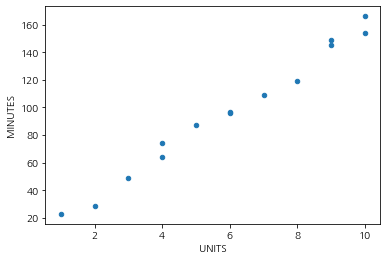

In [14]:
df_raw.plot.scatter(x="UNITS",y="MINUTES")

In [15]:
# 목표변수와 설명변수의 상관분석
df_raw.corr(method="pearson").round(3) # kendall, spearman

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [16]:
# 목표변수와 설명변수의 상관분석
df_raw.corr(method="spearman").round(3) # kendall, pearson

,UNITS,MINUTES
UNITS,1.000,0.996
MINUTES,0.996,1.000


In [18]:
# 선형 회귀 분석 : formula(y ~ x1+ x2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨.
reg_model = smf.ols(formula="MINUTES~UNITS", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())
print("자유도 : DF Residuals")

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           8.92e-13
Time:                        14:08:04   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

### 오차의 기본가정 검토

    등분산성 / 독립성 검정
    잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성과 독립성을 만족한다.

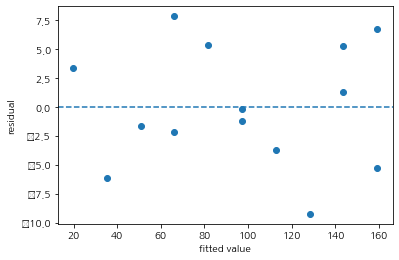

In [20]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

    정규성 검정
    정규분포 직선(적색선)을 중심으로 분포하고 검정 통계량이 귀무가설을 채택하므로 정규분포를 따름

NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

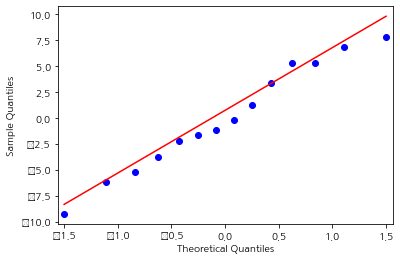

In [23]:
qqplot(reg_result.resid, line="q")
omni_normtest(reg_result.resid, axis=0)

### 최종 회귀식
    Yhat = 4.1617 + 15.5088*Units

=> 부품 수가 1단위 증가할 때마다 수리 시간은 15.088분 증가하게 된다.

# 다중 회귀 분석

In [28]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#선형회귀모형
from sklearn.linear_model import LinearRegression

#변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

### Data Open

In [26]:
df=pd.read_csv("data/BigData/체질검사.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
FAT        252 non-null float64
AGE        252 non-null int64
WEIGHT     252 non-null float64
HEIGHT     252 non-null float64
NECK       252 non-null float64
CHEST      252 non-null float64
ABDOMEN    252 non-null float64
HIP        252 non-null float64
THIGH      252 non-null float64
KNEE       252 non-null float64
ANKLE      252 non-null float64
BICEPS     252 non-null float64
FOREARM    252 non-null float64
WRIST      252 non-null float64
dtypes: float64(13), int64(1)
memory usage: 27.6 KB


In [30]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### 변수 간의 경향성 파악 - 그래프 분석

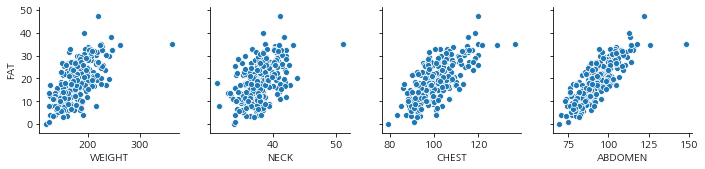

In [34]:
sns.pairplot(df, y_vars="FAT", x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'])

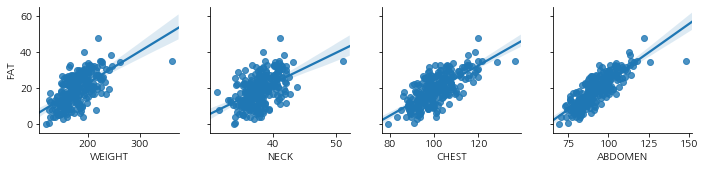

In [31]:
sns.pairplot(df, y_vars="FAT", x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'], kind='reg')

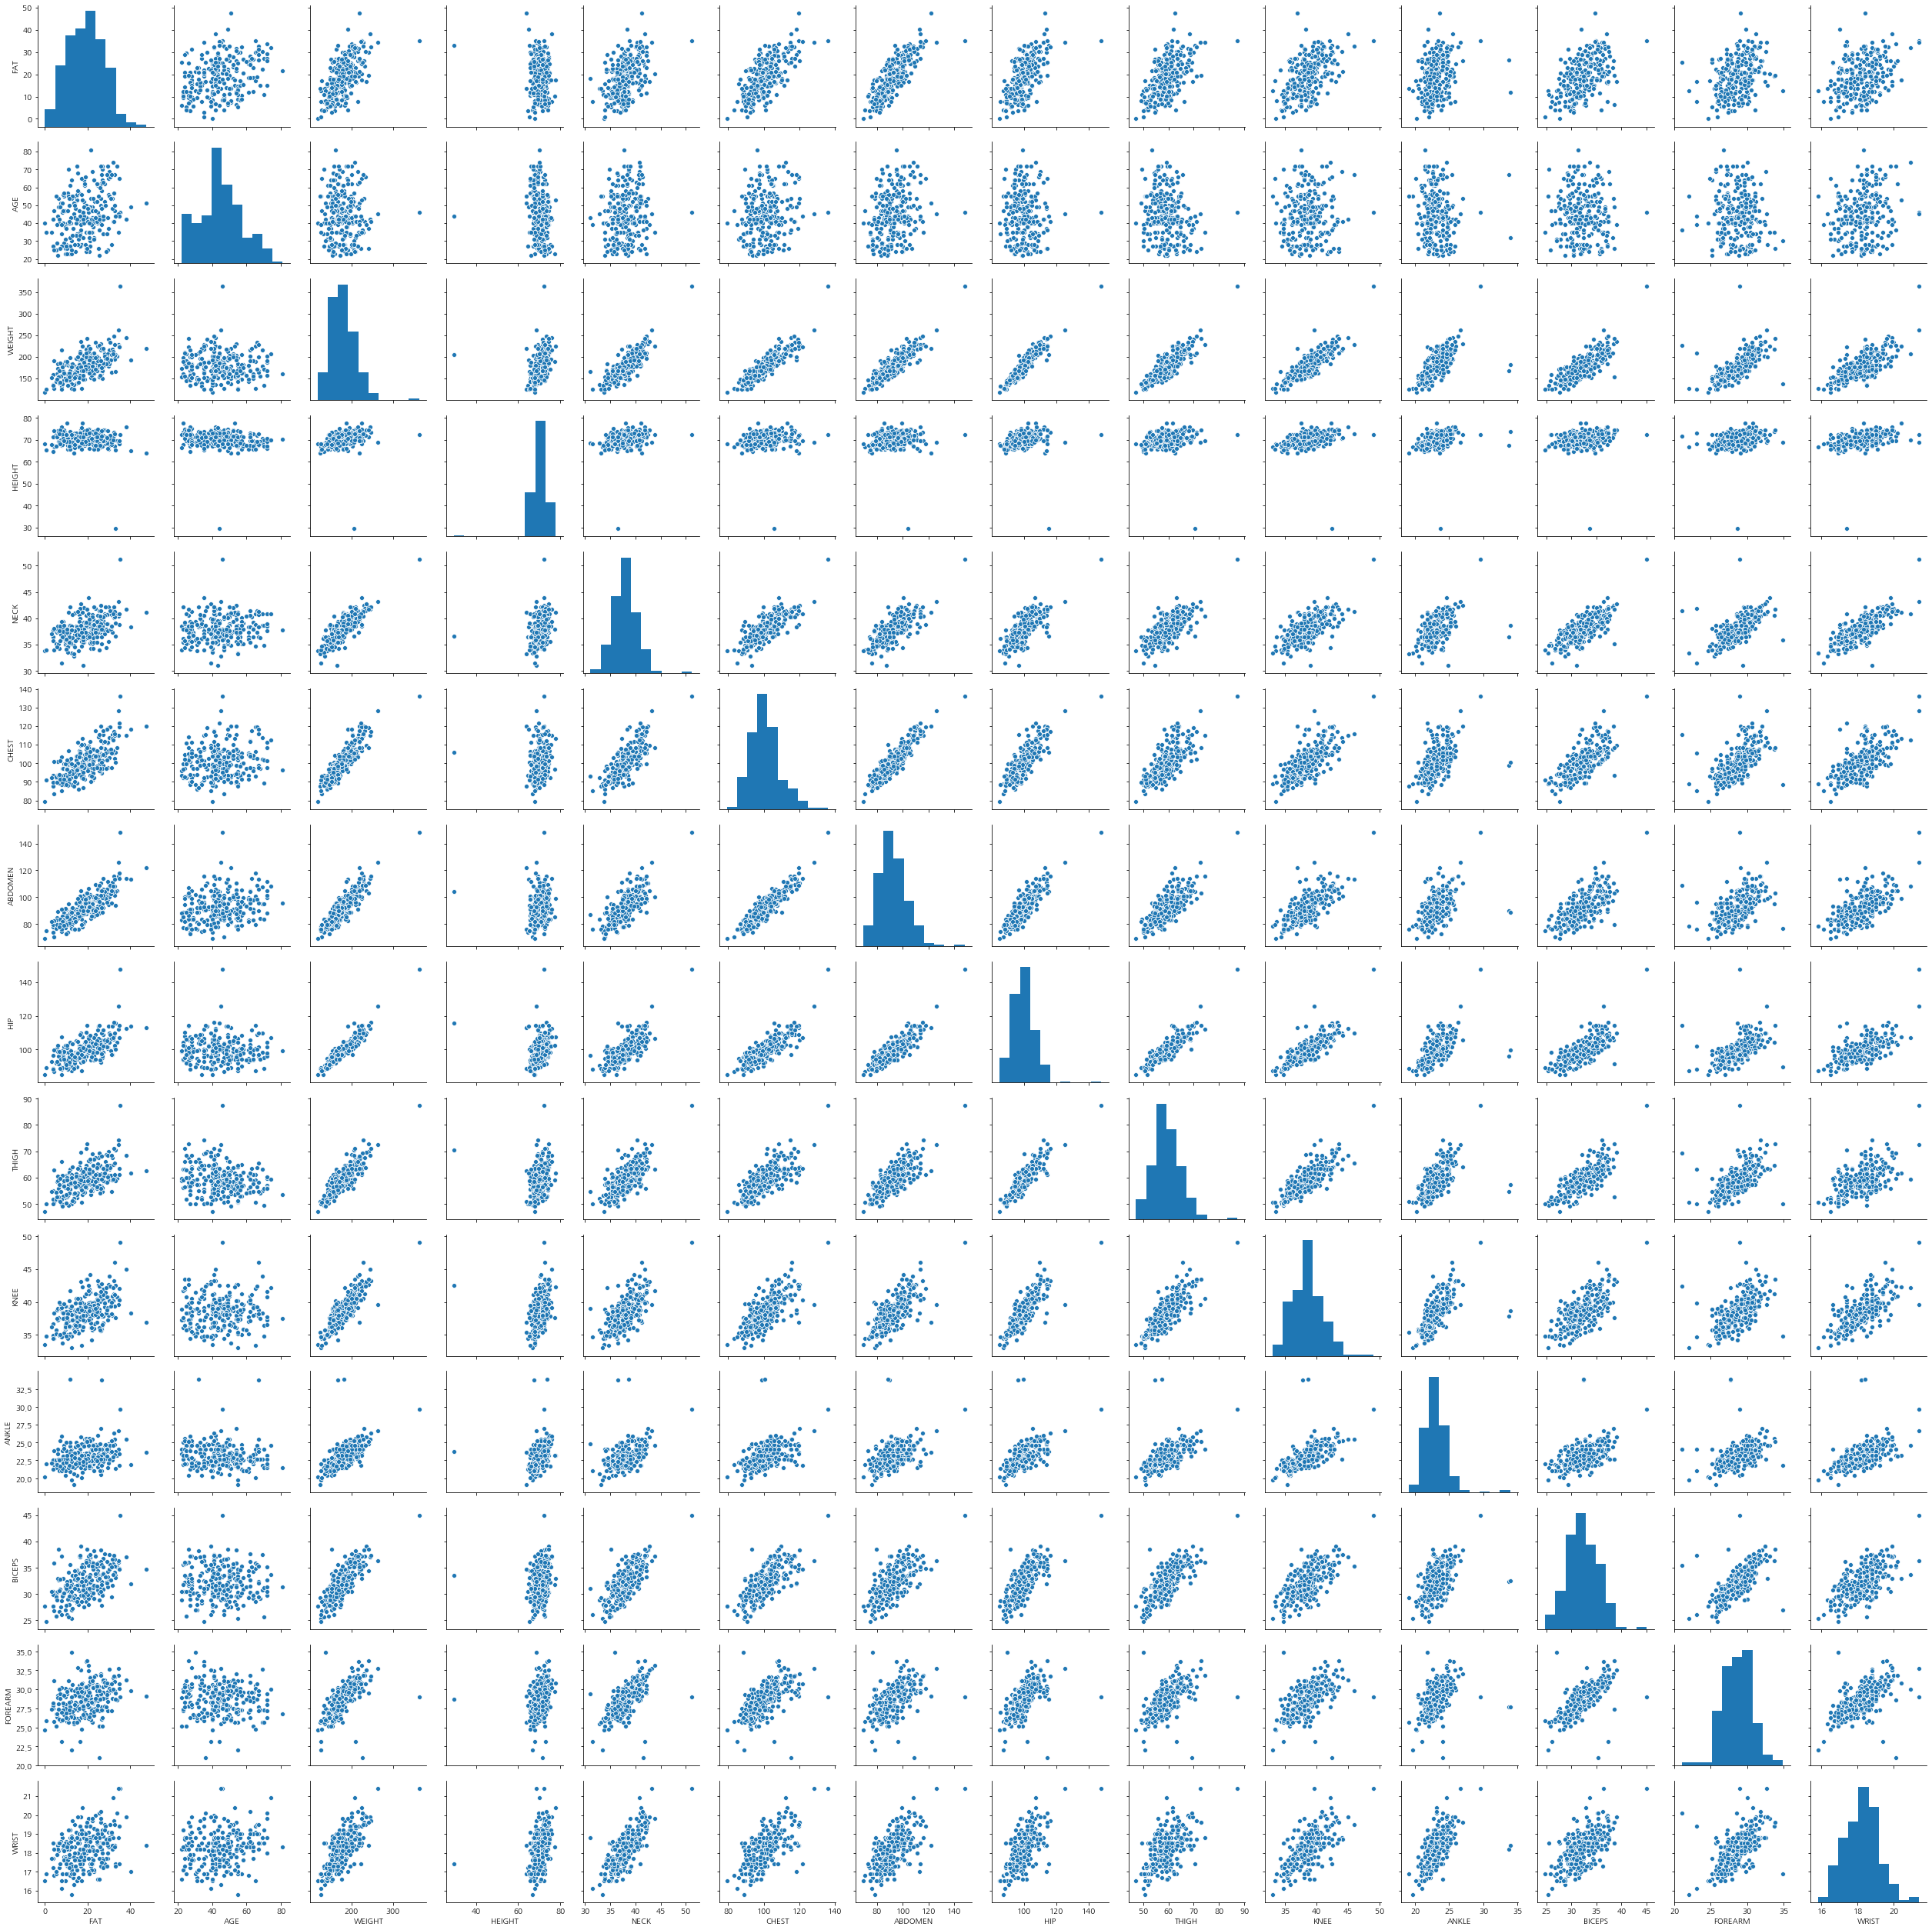

In [33]:
sns.pairplot(df)

In [35]:
df.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


### 회귀 모델 생성  설명 변수 전체

In [40]:
# 선형 회귀 분석
reg_model = smf.ols(formula="FAT~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN +  \
                    HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data=df)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           7.72e-64
Time:                        16:12:41   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

### 회귀 모델 생성 : 설명변수 간의 다중공선성 확인

In [38]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_x= df.drop('FAT',axis=1)

# statsmodels의 상수항 추가 함수 적용
df_x_const = add_constant(df_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['varible']= df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i ) for i in range(df_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,varible,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


### 회귀 모델 생성 : 설명변수 다중공선성 처리

In [41]:
reg_model = smf.ols(formula="FAT~AGE + HEIGHT + NECK + CHEST + ABDOMEN +  \
                    HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data=df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.75e-64
Time:                        16:16:27   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

### 회귀 모델 생성 : 설명변수 다중공선성 처리(다시)

In [43]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_x= df.drop(['FAT',"WEIGHT"],axis=1)

# statsmodels의 상수항 추가 함수 적용
df_x_const = add_constant(df_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['varible']= df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i ) for i in range(df_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,varible,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


### 후진제거법을 이용한 변수 선택

In [45]:
# RFE(recursive feature elimination) function : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_y=df['FAT']

# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select=5).fit(df_x,df_y)

# 선택된 변수
selected_cols = df_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]

print("Selected Varibles : {}".format(selected_cols))
print("Removed Varibles : {}".format(removed_cols))

Selected Varibles : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Varibles : Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


### 후진제거법을 이용한 변수 선택 및 모델 생성

In [47]:
# 회귀모델 생성
rfe_reg_model = smf.ols(formula = "FAT~NECK + ABDOMEN + HIP + FOREARM + WRIST", data=df)

#fitting
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           4.38e-68
Time:                        16:27:04   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

### 후진제거법을 이용한 변수 선택 - 선택된 설명변수의 다중공선성 재진단

In [48]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF", inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


## 결론 도출
    yhat = 2.7037 -0.6012Neck + 0.9743ABDOMEN -0.3316HIP + 0.4095FOREARM -1.6180WRIST

비표준화 회귀계수 기준

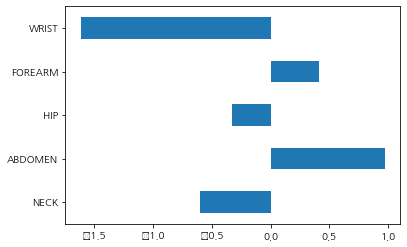

손목 두께가 얇을수록 체질 비만도가 높음
복부둘레가 커질수록 체질 비만도가 높음


In [50]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y="Coef", legend=False)
plt.show()
print("손목 두께가 얇을수록 체질 비만도가 높음")
print("복부둘레가 커질수록 체질 비만도가 높음")

표준화 회귀계수 기준

In [57]:
df_x.head()

,AGE,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [51]:
scaler = StandardScaler()

cols= df_x.columns

np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled['FAT'] = df['FAT']
reg_model_scaled = smf.ols(formula="FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           4.38e-68
Time:                        16:40:37   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

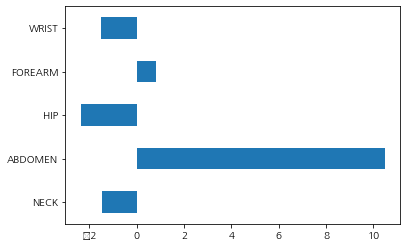

복부 둘레가 가장 중요하고 손목두께의 중요도는 줄어든 반면 엉덩이 변수의 중요도가 증가함
단, 모델의 통계량은 변화 없음


In [53]:
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_scaled_coef.plot.barh(y="Coef", legend=False)
plt.show()
print("복부 둘레가 가장 중요하고 손목두께의 중요도는 줄어든 반면 엉덩이 변수의 중요도가 증가함")
print("단, 모델의 통계량은 변화 없음")

In [55]:
df_reg_scaled_coef

,Coef
NECK,-1.458539
ABDOMEN,10.484903
HIP,-2.370949
FOREARM,0.825752
WRIST,-1.507530


### DIABETES.CSV